Training samples: 25000
Test samples: 25000
Training data shape: (25000, 200)
Test data shape: (25000, 200)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 200, 128)       │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 200, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 200, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,465,985 (5.59 MB)

 Trainable params: 1,465,601 (5.59 MB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.6548 - loss: 0.6491 - val_accuracy: 0.8479 - val_loss: 0.4144
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.8909 - loss: 0.2727 - val_accuracy: 0.8510 - val_loss: 0.3340
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.9203 - loss: 0.2067 - val_accuracy: 0.8505 - val_loss: 0.4119
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.9379 - loss: 0.1583 - val_accuracy: 0.8561 - val_loss: 0.3983
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.9639 - loss: 0.1019 - val_accuracy: 0.8330 - val_loss: 0.6274
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9713 - loss: 0.0789 - val_accuracy: 0.8471 - val_loss: 0.5643
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.9802 - loss: 0.0591 - val_accuracy: 0.8182 - val_loss: 0.6756
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.9811 - loss: 0.0515 - val_

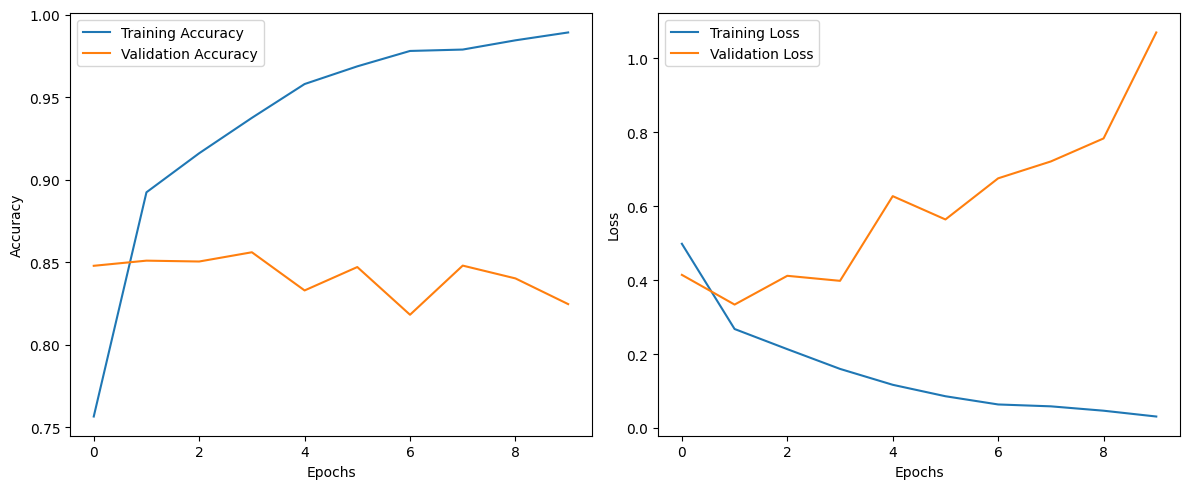

In [ ]:
# Step 1: Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential   # Sequential model for stacking layers
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt   # For plotting training/validation results

# Step 2: Load the IMDB dataset
# Keep only the top 10,000 most frequent words (others will be ignored)
max_words = 10000
# Limit each review to 200 words (truncate longer ones, pad shorter ones)
maxlen = 200

# Load IMDB dataset (already tokenized into integers)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

print(f"Training samples: {len(X_train)}")   # Number of training reviews
print(f"Test samples: {len(X_test)}")       # Number of test reviews

# Step 3: Preprocess the data (make all reviews the same length)
# Shorter reviews are padded with zeros, longer reviews are cut at maxlen
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

print(f"Training data shape: {X_train.shape}")   # Shape = (25000, 200)
print(f"Test data shape: {X_test.shape}")        # Shape = (25000, 200)

# Step 4: Define the RNN model
model = Sequential([
    # Embedding layer: converts word indices into dense vectors of size 128
    Embedding(input_dim=max_words, output_dim=128, input_length=maxlen),

    # First LSTM layer with 128 units, returns full sequence so next LSTM can read it
    LSTM(128, return_sequences=True),
    BatchNormalization(),   # Normalizes outputs to stabilize training
    Dropout(0.3),           # Randomly drops 30% neurons to prevent overfitting

    # Second LSTM layer with 64 units (no return_sequences, only final output kept)
    LSTM(64),
    BatchNormalization(),
    Dropout(0.3),

    # Fully connected dense layer with ReLU activation
    Dense(64, activation='relu'),
    Dropout(0.4),  # Drop 40% neurons for stronger regularization

    # Final output layer with sigmoid (since this is binary classification)
    Dense(1, activation='sigmoid')
])

# Show model structure
model.build(input_shape=(None, maxlen))
model.summary()

# Step 5: Compile the model
# Optimizer: Adam (adaptive learning), Loss: binary crossentropy (2 classes), Metric: accuracy
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Train the model
# Train for 10 epochs with batch size of 128
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_test, y_test)   # Check performance on test data after each epoch
)

# Step 7: Evaluate
# Evaluate on test dataset (final performance)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Step 8: Plot results
plt.figure(figsize=(12, 5))

# Plot accuracy (train vs validation)
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss (train vs validation)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
